In [1]:
pwd

'/content'

In [5]:
ls /content/drive/MyDrive/Inceptez\ Batch\ 16/02.\ Pre-Processing-2

bank/  Untitled0.ipynb


In [6]:
cd /content/drive/MyDrive/Inceptez\ Batch\ 16/02.\ Pre-Processing-2

/content/drive/MyDrive/Inceptez Batch 16/02. Pre-Processing-2


In [1]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("bank-full.csv", sep=';')

In [4]:
data_work = data.copy()

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [16]:
data.duplicated().sum()

0

In [17]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [21]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

age
Outliers =  29158    83
29261    75
29263    75
29322    83
29865    75
         ..
45163    71
45191    75
45204    73
45207    71
45208    72
Name: age, Length: 487, dtype: int64
balance
Outliers =  34       10635
65        6530
69       12223
70        5935
186       4384
         ...  
45164     4655
45181     6879
45185     4256
45191     3810
45208     5715
Name: balance, Length: 4729, dtype: int64
day
Outliers =  Series([], Name: day, dtype: int64)
duration
Outliers =  37       1666
43       1492
53        787
59       1778
61        812
         ... 
45124     701
45199    1166
45200    1556
45206     977
45208    1127
Name: duration, Length: 3235, dtype: int64
campaign
Outliers =  758       7
780       8
906       7
1103      8
1105      7
         ..
44666     7
44680     9
44770     9
44886    12
45056     7
Name: campaign, Length: 3064, dtype: int64
pdays
Outliers =  24060    151
24062    166
24064     91
24072     86
24077    143
        ... 
45199    530
45201    184


In [22]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [25]:
data['job'].replace({'admin.':'admin'}, inplace = True)

In [28]:
data['job'].replace({'student':0,
                     'housemaid':1,
                     'unemployed':2,
                     'self-employed':3,
                     'services':4,
                     'admin':5,
                     'retired':6,
                     'blue-collar':7,
                     'entrepreneur':8,
                     'technician':9,
                     'management':10,
                     'unknown':np.nan

}, inplace = True)

In [30]:
data["job"].value_counts()

7.0     9732
10.0    9458
9.0     7597
5.0     5171
4.0     4154
6.0     2264
3.0     1579
8.0     1487
2.0     1303
1.0     1240
0.0      938
Name: job, dtype: int64

In [31]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [36]:
data['marital'].value_counts(dropna=False)

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [38]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [40]:
data['education'].replace({'unknown':np.nan}, inplace = True)

In [42]:
data["default"].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [47]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [48]:
data['contact'].replace({'unknown':np.nan}, inplace = True)

In [50]:
data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [52]:
data["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [53]:
data["duration"].value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [54]:
data.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
y                0
dtype: int64

In [58]:
data["job"].fillna(-1, inplace = True)

In [61]:
data["education"].fillna('others', inplace = True)

In [63]:
data["contact"].fillna('others', inplace = True)

In [67]:
#we are removing job column because we have done label encoding before
numerical_data = data.select_dtypes(include=np.number).drop(columns=['job'])

In [69]:
categorical_data = data.select_dtypes(exclude=np.number)

In [70]:
#Performng standard scaling
from sklearn.preprocessing import StandardScaler
 
std_scale = StandardScaler()
df_std = std_scale.fit_transform(numerical_data)

In [73]:
numerical_data_preprocessed = pd.DataFrame(df_std,columns = numerical_data.columns)

In [75]:
categorical_data_processed = pd.get_dummies(categorical_data)

In [79]:
pre_processed_data = pd.concat([numerical_data_preprocessed,categorical_data_processed,data['job']], axis = 1)

In [8]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


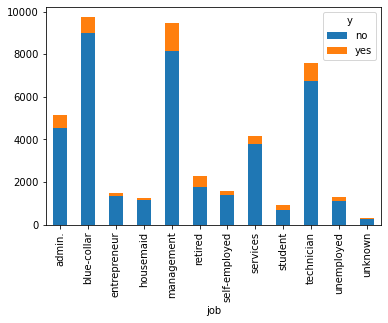

In [17]:
#Exercise in plotting for Bank marketing

# importing the required module
import matplotlib.pyplot as plt
tab = pd.crosstab(data['job'], data['y'],margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

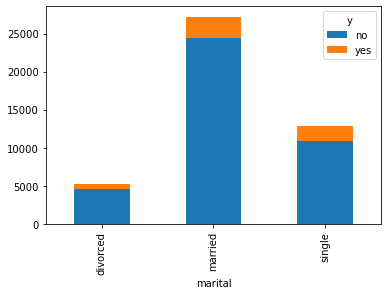

In [18]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['marital'], data['y'],margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

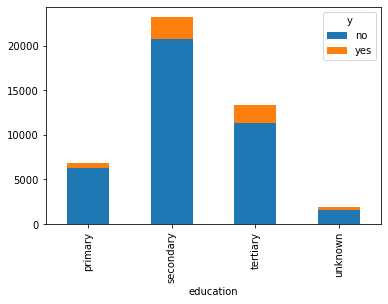

In [19]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['education'], data['y'],margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

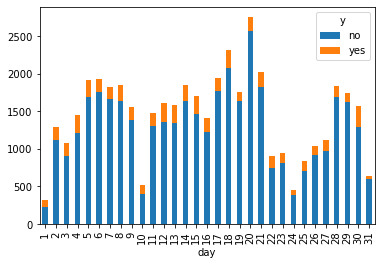

In [23]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['day'], data['y'],margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

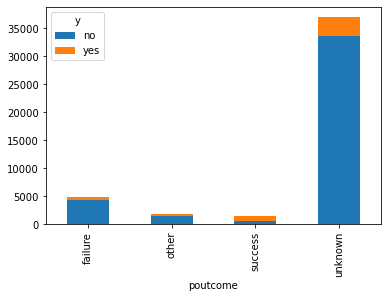

In [31]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['poutcome'], data['y'],margins=True)
tab = tab.drop('All',axis=1)
tab = tab.drop('All',axis=0)
tab.plot(kind='bar', stacked=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['balance'], data['y'],dropna = False, normalize = 'index').round(3)*100
tab.plot(kind='bar')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['age'], data['y']).round(3)*100
tab.plot(kind='hist')
plt.show()

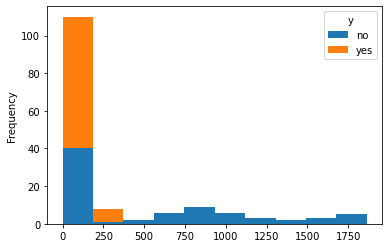

In [53]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['age'], data['y'])
tab.plot(kind='hist', stacked=True)
plt.show()

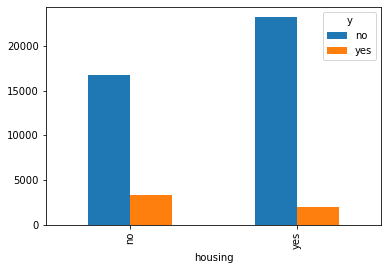

In [59]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['housing'], data['y'])
tab.plot(kind='bar')
plt.show()

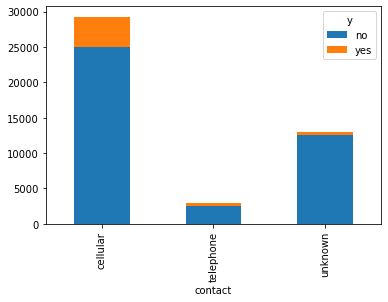

In [61]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['contact'], data['y'])
tab.plot(kind='bar', stacked=True)
plt.show()

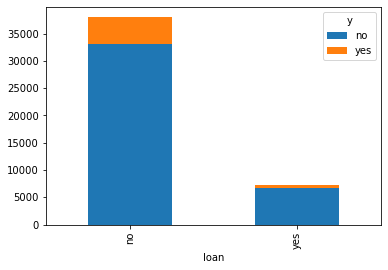

In [62]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['loan'], data['y'])
tab.plot(kind='bar', stacked=True)
plt.show()

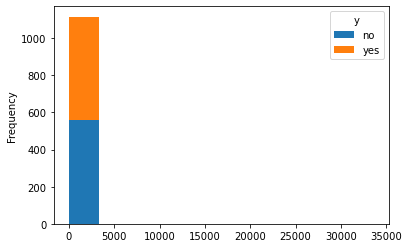

In [64]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['pdays'], data['y'])
tab.plot(kind='hist', stacked=True)
plt.show()

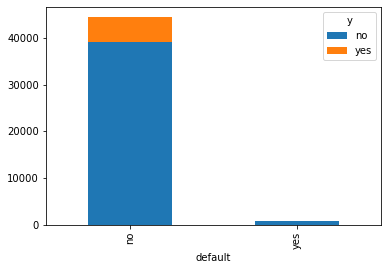

In [66]:
import matplotlib.pyplot as plt
tab = pd.crosstab(data['default'], data['y'])
tab.plot(kind='bar', stacked=True)
plt.show()